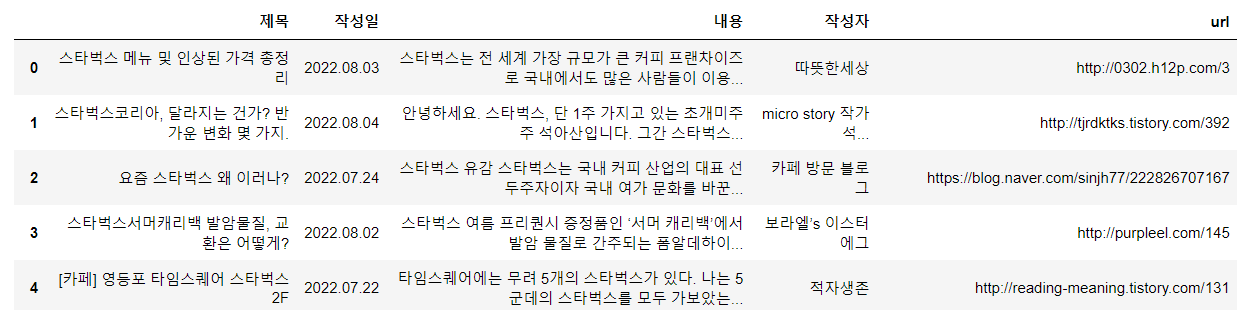

In [34]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

검색어=input('다음 블로그 검색어 입력:')
검색어=검색어.replace(' ','+')
url='https://search.daum.net/search?w=blog&nil_search=btn&DA=NTB&enc=utf8&q='+검색어


html=requests.get(url)

soup=bs(html.text,'html.parser')

div_tags=soup.find_all('div','cont_inner')
res=[]
for div in div_tags:
    title=div.find('a','f_link_b').text
    href=div.find('a','f_link_b')['href']
    date=div.find('span','f_nb date').text
    contents=div.find('p','f_eb desc').text
    writer=div.find('a','f_nb').text
    tmp={
        '제목':title,
        '작성일':date,
        '내용':contents,
        '작성자':writer,
        'URL':href
    }
    res.append(tmp)

df=pd.DataFrame(res)
display(df)

다음 블로그 검색어 입력:수원 원룸


,제목,작성일,내용,작성자,URL
0,수원원룸청소 세류동 원룸 청소 말끔하게 해결하였습니다. PKB클린에서,2022.07.25,PKB클린과 함께하세요! 전문입주청소업체 PKB클린 ***-****-****​ ​ ...,전문업체PKB클린,https://blog.naver.com/pkb1756/222828639474
1,"수원 영통 근처 원룸구하기 - 자취방 ,원룸",2022.06.17,영통지역에서 20년 정도 거주했음. 영통이 원룸 구해서 살기 좋은이유는 - 원룸의 ...,록기의 리뷰,http://swleekka.tistory.com/114
2,수원원룸 시설과 인프라 굿 무보증으로,2022.07.31,수원원룸 시설과 인프라 굿 무보증으로 몽쉘하우스 수원점 : 룸투어 및 입실문의 룸투...,은밀한 정보,https://blog.naver.com/vecome7833/222835349030
3,수원원룸 시설과 인프라 좋고 가성비까지 좋은 곳,2022.07.31,수원원룸 시설과 인프라 좋고 가성비까지 좋은 곳 몽쉘하우스 수원점 : 룸투어 및 입...,고독한 영욱씨,https://blog.naver.com/ovelya4158/222835492396
4,수원 원룸이사 고색동원룸이사 평리동원룸이사 진행 후기~~,2022.08.05,안녕하세요 언제나 즐겁게 고객님 이사를 진행해 드리는 #수원원룸이사 전문 #원스톱이...,원스톱이사,https://blog.naver.com/mkc1899/222840282427
5,♡ 수원원룸 ♡ 월세 ♡ 몸만와도되는 ♡ 풀옵션 ♡,4시간전,♡ 수원원룸 ♡ 월세 ♡ 몸만와도되는 ♡ 풀옵션 ♡ 안녕하세요 반짝반짝 조실장입니다...,반짝반짝 조실장의 블...,https://blog.naver.com/chi_tam/222842734919
6,수원원룸월세 가성비 좋고 시설 인프라까지!,2022.07.31,하면서 수요일까지 높다고 생각이 드는데요. 이번에 알려드리고자 하는 수원 원룸 경우...,찬수의 슬기로움,https://blog.naver.com/ddeserv0403/222835164632
7,수원원룸이사 남창동원룸이사 장안동원룸이사 진행 후기~~,2022.07.28,안녕하세요 언제나 즐거운 마음으로 고객님 이사를 진행 하고있는 #수원원룸이사 전문 ...,원스톱이사,https://blog.naver.com/mkc1899/222832981783
8,수원 원룸 입주청소에서 줄눈시공까지 한 번에 가능,2022.08.02,셀프로 청소하고자 하더라도 모든 때를 지우는 것은 쉽지 않습니다. 그래서 수원 원룸...,리마홈케어,https://blog.naver.com/rima3909/222837385508
9,수원 매탄동 원룸 청소 2번째 재방문,2022.07.24,수원 매탄동 원룸 청소 2번째 재방문 2번째 재방문 ​ 매탄동 원-투룸(원룸청소) ...,일상 블로그,https://blog.naver.com/qazws1756/222826904740


In [35]:
print(url)

https://search.daum.net/search?w=blog&nil_search=btn&DA=NTB&enc=utf8&q=수원+원룸


In [51]:
# 1~10PAGE까지 다음 블로그 크롤링 하기
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

검색어=input('다음 블로그의 검색어 입력:')
검색어=검색어.replace(' ','+')
pages=int(input('몇 페이지까지 크롤링하시래요? \n페이지당: 10개임:'))

res=[]
for page in range(1,pages+1):
    url='https://search.daum.net/search?nil_suggest=btn&w=blog&DA=PGD&q='+검색어+'&p='+str(page)
    html=requests.get(url)

    soup=bs(html.text,'html.parser')

    div_tags=soup.find_all('div','cont_inner')
    for div in div_tags:
        try:
            title=div.find('a','f_link_b').text
            href=div.find('a','f_link_b')['href']
            date=div.find('span','f_nb date').text
            contents=div.find('p','f_eb desc').text
            writer=div.find('a','f_nb').text
            tmp={
                '제목':title,
                '작성일':date,
                '내용':contents,
                '작성자':writer,
                'URL':href
            }
            res.append(tmp)
        except:
            pass

df=pd.DataFrame(res)
display(df)


다음 블로그의 검색어 입력:서울 원룸
몇 페이지까지 크롤링하시래요? 
페이지당: 10개임:20


,제목,작성일,내용,작성자,URL
0,서울 원룸 2022년 새로 지은 디딤 하우스,2022.08.01,​ 안녕하세요. 공인중개사 이우람입니다. 서울 원룸 촬영 다녀왔습니다. ​ 올해 여...,real estate agent,https://blog.naver.com/city_property/222836239789
1,서울 원룸 자치방 구하는법,2022.07.12,​ 안녕하세요 부동산 천재 킹메이커입니다. ​ 오늘은 사회초년생들에게 필요한 서울 ...,부동산 천재 킹메이커,https://blog.naver.com/inji1984/222807060884
2,서울 원룸 가격 Vs 서울 고시원 고시텔 원룸텔 가격 & 장단점 비교!,2022.06.08,가격과 서울 고시원 고시텔 원룸텔의 가격에도 당연히 차이가 있습니다. ​ ​ 서울 ...,사업가의 독서법,https://blog.naver.com/realgosi1/222764666780
3,서울 원룸 에어컨 청소 자연홈케어 추천,2022.06.11,청소 #여름에어컨청소 #자연홈케어 ​ ​ 서울 원룸 에어컨 청소 자연홈케어 ​ ​ ...,해피윤뚱의 일상,https://blog.naver.com/gnlyun/222764898718
4,서울 경기 원룸이사 가격,2022.07.26,듭니다 서울 경기 지역에서 이사 준비 하십니까? 중소형 전문 이사센터 입니다. #서...,가까운이사16617824,https://blog.naver.com/qlcrkqwk/222829110790
...,...,...,...,...,...
194,서울 구로구 오피스텔 원룸 거주청소,2022.07.05,#클린평안#cleancalm에게 맡겨주시기 바랍니다! ​ 오늘 작업 장소는 서울 구...,클린평안cleancalm의 ...,https://blog.naver.com/psmp78/222801492694
195,"요즘 서울 월세 동향, 오랜만에 서울 원룸 찾기 후기(feat. 내 집 한채...",2022.07.07,그 이 후에 찾아보고 중개사분한테 물어볼 것도 많긴하네요. ​ 요즘 서울에서 1인가...,투자로 꿀통에 꿀 담...,https://blog.naver.com/tatee3303/222803911690
196,마포구 원룸 인생 첫 독립 보증금이 부담스럽다면 서울 무보증 원룸으로...,2022.04.25,바로 가기 입니다 ↓↓↓ 홀로스탠딩 - 서울 무보증금 원룸 자취의 시작 홀로스탠딩은...,십수년째 와린이 '-',https://blog.naver.com/zzzkiess/222710171846
197,#클린업 [서울/대방동] 원룸 이사 후 폐기물 처리 작업,2022.04.28,처리 #서울원룸정리 #대방동오피스텔정리 #원룸이사 #오피스텔이사 © galina88...,클린업 010-8894-1595...,https://blog.naver.com/sfc2644/222714068630


In [50]:
print(url)

https://search.daum.net/search?nil_suggest=btn&w=blog&DA=PGD&q=서울+원룸&p=12


In [48]:
df['작성자'].value_counts()

 .                  3
 전문업체PKB클린          2
 홈즈공인중개사사무소         2
 ■ 행복하우스 ■          2
 아보카도 마켓            2
                   ..
 (주)클린앤제이           1
 해충방제 및 바이러스...     1
 우리의 얘기를 쓰겠소        1
 코코의 무지개세상          1
 01033342400        1
Name: 작성자, Length: 148, dtype: int64